<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/Fifa_World_Cups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#link dos dados: https://www.kaggle.com/datasets/iamsouravbanerjee/fifa-football-world-cup-dataset



---
*   Qual o número de Copas do Mundo FIFA conquistadas por cada seleção?
*   Qual o número de medalhas conquistadas por cada seleção em Copas do Mundo FIFA?
*   Quantas vezes cada seleção participou da Copa do Mundo FIFA?
*   Quantas vezes as seleções foram desclassificadas na primeira fase da Copa do Mundo FIFA?
*   Qual a média de gols por jogo nas Copas do Mundo FIFA?
---



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
#Importar os dados FIFA - World Cup Summary
fifa_summary = pd.read_csv('/content/FIFA - World Cup Summary.csv')

In [4]:
fifa_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [5]:
#Converter todos os títulos de colunas para lowercase do dataset fifa_summary
fifa_summary.columns = fifa_summary.columns.str.lower()

#Renomear colunas
fifa_summary = fifa_summary.rename(columns = {'runner up': 'second_place', 'third place': 'third_place', 'matches played': 'matches_played', 'goals scored': 'goals_scored', 'avg goals per game': 'avg_goals_per_game'})
fifa_summary.head()

,year,host,champion,second_place,third_place,teams,matches_played,goals_scored,avg_goals_per_game
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [6]:
#Verificar a existência de valores ausentes
fifa_summary.isna().sum()

year                  0
host                  0
champion              0
second_place          0
third_place           0
teams                 0
matches_played        0
goals_scored          0
avg_goals_per_game    0
dtype: int64

In [7]:
#Importar os dados de cada copa e adicionar a coluna 'ano_copa" em cada dataset
fifa_1930 = pd.read_csv('/content/FIFA - 1930.csv').assign(ano_copa = 1930)
fifa_1934 = pd.read_csv('/content/FIFA - 1934.csv').assign(ano_copa = 1934)
fifa_1938 = pd.read_csv('/content/FIFA - 1938.csv').assign(ano_copa = 1938)
fifa_1950 = pd.read_csv('/content/FIFA - 1950.csv').assign(ano_copa = 1950)
fifa_1954 = pd.read_csv('/content/FIFA - 1954.csv').assign(ano_copa = 1954)
fifa_1958 = pd.read_csv('/content/FIFA - 1958.csv').assign(ano_copa = 1958)
fifa_1962 = pd.read_csv('/content/FIFA - 1962.csv').assign(ano_copa = 1962)
fifa_1966 = pd.read_csv('/content/FIFA - 1966.csv').assign(ano_copa = 1966)
fifa_1970 = pd.read_csv('/content/FIFA - 1970.csv').assign(ano_copa = 1970)
fifa_1974 = pd.read_csv('/content/FIFA - 1974.csv').assign(ano_copa = 1974)
fifa_1978 = pd.read_csv('/content/FIFA - 1978.csv').assign(ano_copa = 1978)
fifa_1982 = pd.read_csv('/content/FIFA - 1982.csv').assign(ano_copa = 1982)
fifa_1986 = pd.read_csv('/content/FIFA - 1986.csv').assign(ano_copa = 1986)
fifa_1990 = pd.read_csv('/content/FIFA - 1990.csv').assign(ano_copa = 1990)
fifa_1994 = pd.read_csv('/content/FIFA - 1994.csv').assign(ano_copa = 1994)
fifa_1998 = pd.read_csv('/content/FIFA - 1998.csv').assign(ano_copa = 1998)
fifa_2002 = pd.read_csv('/content/FIFA - 2002.csv').assign(ano_copa = 2002)
fifa_2006 = pd.read_csv('/content/FIFA - 2006.csv').assign(ano_copa = 2006)
fifa_2010 = pd.read_csv('/content/FIFA - 2010.csv').assign(ano_copa = 2010)
fifa_2014 = pd.read_csv('/content/FIFA - 2014.csv').assign(ano_copa = 2014)
fifa_2018 = pd.read_csv('/content/FIFA - 2018.csv').assign(ano_copa = 2018)

In [8]:
#Concatenar os dados de todas as copas
df_copas = pd.concat([fifa_1930, fifa_1934, fifa_1938, fifa_1950, fifa_1954, fifa_1958, fifa_1962, fifa_1966, fifa_1970, fifa_1974, fifa_1978, 
                      fifa_1982, fifa_1986, fifa_1990, fifa_1994, fifa_1998, fifa_2002, fifa_2006, fifa_2010, fifa_2014, fifa_2018]).reset_index(drop = True)

df_copas.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,ano_copa
0,1,Uruguay,4,4,0,0,15,3,12,8,1930
1,2,Argentina,5,4,0,1,18,9,9,8,1930
2,3,United States,3,2,0,1,7,6,1,4,1930
3,4,Yugoslavia,3,2,0,1,7,7,0,4,1930
4,5,Chile,3,2,0,1,5,3,2,4,1930


In [9]:
#Converter todos os títulos de colunas para lowercase do dataset df_copas 
df_copas.columns = df_copas.columns.str.lower()

#Renomear colunas
df_copas = df_copas.rename(columns = {'games played': 'games_played', 'goals for': 'goals_for', 'goals against': 'goals_against', 'goal difference': 'goal_difference'})
df_copas.head()

#Reordenar colunas
df_copas = df_copas[['position', 'ano_copa', 'team',	'games_played',	'win',	'draw',	'loss',	'goals_for',	'goals_against',	'goal_difference',	'points']]

In [10]:
#Verificar a existência de valores ausentes
df_copas.isna().sum()

position           0
ano_copa           0
team               0
games_played       0
win                0
draw               0
loss               0
goals_for          0
goals_against      0
goal_difference    0
points             0
dtype: int64

In [11]:
#Verificar os nomes de cada seleção, porque algumas seleções tiveram nomes diferentes ao longo do tempo
df_copas.team.unique()

array(['Uruguay', 'Argentina', 'United States', 'Yugoslavia', 'Chile',
       'Brazil', 'France', 'Romania', 'Paraguay', 'Peru', 'Belgium',
       'Bolivia', 'Mexico', 'Italy', 'Czechoslovakia', 'Germany',
       'Austria', 'Spain', 'Hungary', 'Switzerland', 'Sweden',
       'Netherlands', 'Egypt', 'Cuba', 'Poland', 'Norway',
       'Dutch East Indies', 'England', 'West Germany', 'Turkey',
       'Scotland', 'South Korea', 'Wales', 'Soviet Union',
       'Northern Ireland', 'Colombia', 'Bulgaria', 'Portugal',
       'North Korea', 'Israel*', 'Bulgaria**', 'Morocco', 'El Salvador',
       'East Germany', 'Australia', 'Haiti', 'Zaire', 'Tunisia', 'Iran',
       'Algeria', 'Cameroon', 'Honduras', 'Kuwait', 'New Zealand',
       'Denmark', 'Iraq', 'Canada', 'Republic of Ireland', 'Costa Rica',
       'United Arab Emirates', 'Nigeria', 'Saudi Arabia', 'Russia',
       'Greece', 'Croatia', 'FR Yugoslavia', 'Jamaica', 'South Africa',
       'Japan', 'Senegal', 'Ecuador', 'Slovenia', 'China PR

In [12]:
#Substituir o nome da Alemanha
df_copas = df_copas.replace(["East Germany", "West Germany"], "Germany")
df_copas.team.unique()

array(['Uruguay', 'Argentina', 'United States', 'Yugoslavia', 'Chile',
       'Brazil', 'France', 'Romania', 'Paraguay', 'Peru', 'Belgium',
       'Bolivia', 'Mexico', 'Italy', 'Czechoslovakia', 'Germany',
       'Austria', 'Spain', 'Hungary', 'Switzerland', 'Sweden',
       'Netherlands', 'Egypt', 'Cuba', 'Poland', 'Norway',
       'Dutch East Indies', 'England', 'Turkey', 'Scotland',
       'South Korea', 'Wales', 'Soviet Union', 'Northern Ireland',
       'Colombia', 'Bulgaria', 'Portugal', 'North Korea', 'Israel*',
       'Bulgaria**', 'Morocco', 'El Salvador', 'Australia', 'Haiti',
       'Zaire', 'Tunisia', 'Iran', 'Algeria', 'Cameroon', 'Honduras',
       'Kuwait', 'New Zealand', 'Denmark', 'Iraq', 'Canada',
       'Republic of Ireland', 'Costa Rica', 'United Arab Emirates',
       'Nigeria', 'Saudi Arabia', 'Russia', 'Greece', 'Croatia',
       'FR Yugoslavia', 'Jamaica', 'South Africa', 'Japan', 'Senegal',
       'Ecuador', 'Slovenia', 'China PR', 'Ukraine', 'Ghana',
       'I



---


# **Número de Copas do Mundo FIFA conquistadas por cada seleção**

In [13]:
#Selecionar os dados dos campeões para gerar uma plotagem com o número de campeonatos mundiais conquistados por cada seleção
champions = df_copas[['team', 'ano_copa']].loc[df_copas.position == 1]
champions.team.unique()

array(['Uruguay', 'Italy', 'Germany', 'Brazil', 'England', 'Argentina',
       'France', 'Spain'], dtype=object)

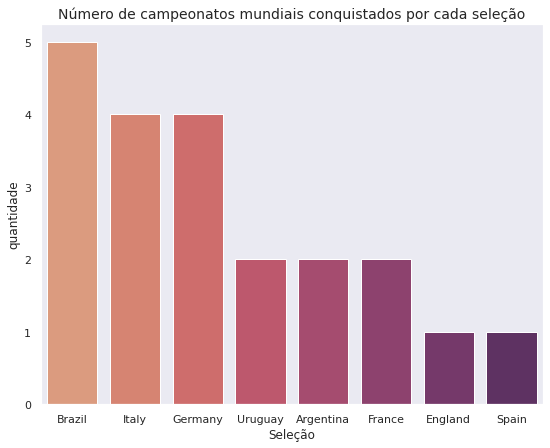

In [14]:
plt.figure(figsize = (9,7))
sns.set_theme(style = "dark")
ax = sns.countplot(x = 'team', data = champions, palette = "flare", order = champions['team'].value_counts().index)

plt.ylabel('quantidade')
plt.xlabel('Seleção')
plt.title('Número de campeonatos mundiais conquistados por cada seleção', fontsize = 14)
plt.show()

---
# **Número de medalhas conquistadas por cada seleção em Copas do Mundo FIFA**


In [15]:
#Selecionar os dados relacionados ao número de medalhas conquistadas por cada seleção
df1 = df_copas[['team', 'position']].loc[df_copas.position == 1].groupby('team').count().reset_index()
df2 = df_copas[['team', 'position']].loc[df_copas.position == 2].groupby('team').count().reset_index()
df3 = df_copas[['team', 'position']].loc[df_copas.position == 3].groupby('team').count().reset_index()

#Agrupar os dados em um novo data frame
df4 = pd.merge(df1, df2, how = 'outer', on = ['team'])
df_podiums = pd.merge(df4, df3, how = 'outer', on = ['team']).rename(columns = {'position_x':'ouro', 'position_y':'prata', 'position': 'bronze'}).fillna(0)

#Converter os dados para o tipo integer
df_podiums = df_podiums.astype({'ouro': 'int', 'prata': 'int', 'bronze': 'int'})

print(df_podiums)

              team  ouro  prata  bronze
0        Argentina     2      3       0
1           Brazil     5      2       2
2          England     1      0       0
3           France     2      1       2
4          Germany     4      4       4
5            Italy     4      2       1
6            Spain     1      0       0
7          Uruguay     2      0       0
8          Croatia     0      1       1
9   Czechoslovakia     0      2       0
10         Hungary     0      2       0
11     Netherlands     0      3       1
12          Sweden     0      1       2
13         Austria     0      0       1
14         Belgium     0      0       1
15           Chile     0      0       1
16          Poland     0      0       2
17        Portugal     0      0       1
18          Turkey     0      0       1
19   United States     0      0       1


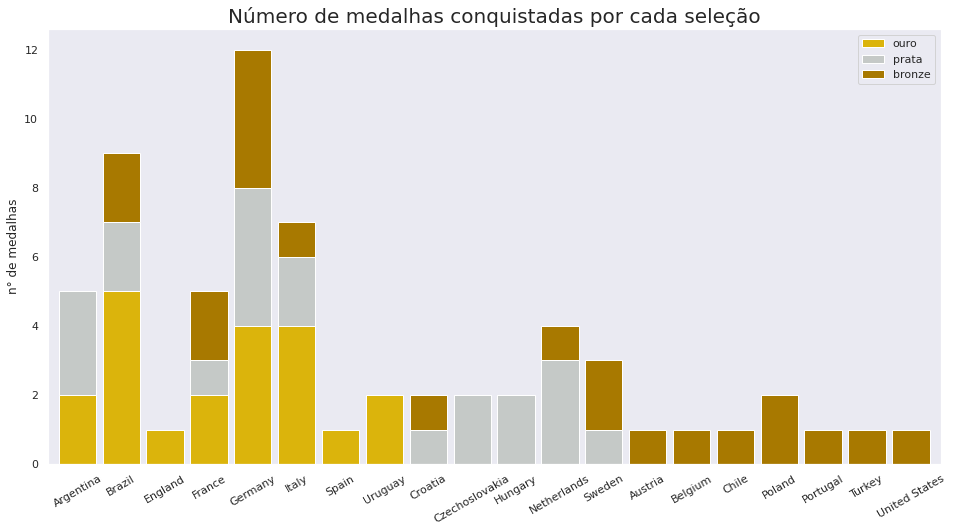

In [16]:
#Plotar um gráfico empilhado com o número de medalhas conquistadas por cada seleção
plt.rcParams["figure.figsize"] = (16,8)
sns.set_theme(style = "dark")

ax = df_podiums.set_index('team').plot(kind = 'bar', stacked = True, color = ['#dbb40c', '#c5c9c7', '#a87900'], width = 0.85)

plt.ylabel('n° de medalhas')
ax.set(xlabel=None)
plt.title('Número de medalhas conquistadas por cada seleção', fontsize = 20)
plt.xticks(rotation = 30) 
plt.show()



---


# **Número de vezes que cada seleção participou de Copas do Mundo FIFA**

In [17]:
#Número de Copas do Mundo FIFA
df_copas['ano_copa'].nunique()

21

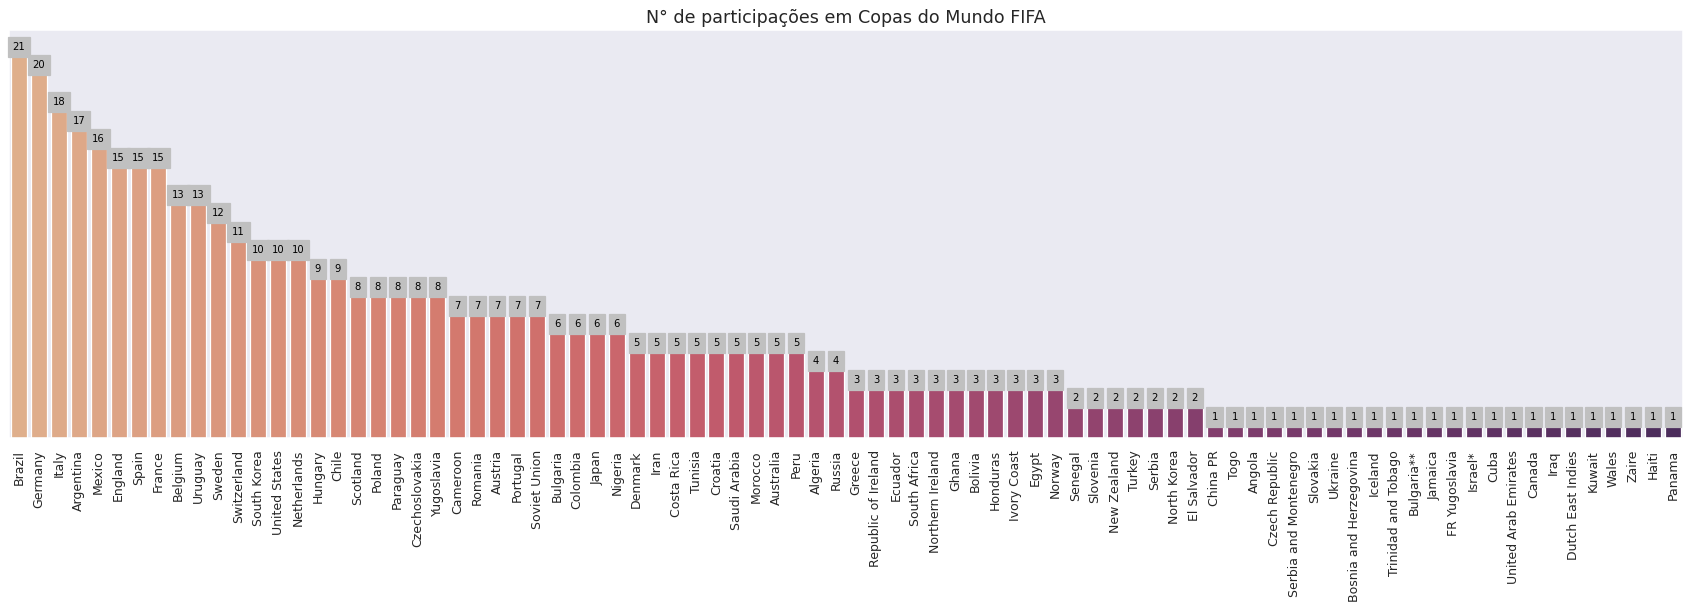

In [75]:
#Gráfico que mostra o número de participações de cada seleção em Copas do Mundo FIFA
fig = plt.figure(figsize=(24, 6), dpi = 90)
sns.set_theme(style="dark")

ax = sns.countplot(x = 'team', data = df_copas, palette = "flare", order = df_copas['team'].value_counts().index)
plt.title('N° de participações em Copas do Mundo FIFA', fontsize = 14)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
ax.set(xlabel = None)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = int(p.get_height())
  ax.text(_x, _y, value, ha = "center",
  fontsize = 8,
  color = 'black',
  backgroundcolor = 'silver')  

---


# **Número de vezes que as seleções foram desclassificadas na primeira fase da Copa do Mundo FIFA** 

In [19]:
#Cópia do dataset df_copas para verificar o número de vezes que as seleções não se classificaram para a fase eliminatória da competição
disqualified = df_copas.copy()
disqualified.head()

,position,ano_copa,team,games_played,win,draw,loss,goals_for,goals_against,goal_difference,points
0,1,1930,Uruguay,4,4,0,0,15,3,12,8
1,2,1930,Argentina,5,4,0,1,18,9,9,8
2,3,1930,United States,3,2,0,1,7,6,1,4
3,4,1930,Yugoslavia,3,2,0,1,7,7,0,4
4,5,1930,Chile,3,2,0,1,5,3,2,4


In [20]:
disqualified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   position         457 non-null    int64 
 1   ano_copa         457 non-null    int64 
 2   team             457 non-null    object
 3   games_played     457 non-null    int64 
 4   win              457 non-null    int64 
 5   draw             457 non-null    int64 
 6   loss             457 non-null    int64 
 7   goals_for        457 non-null    int64 
 8   goals_against    457 non-null    int64 
 9   goal_difference  457 non-null    object
 10  points           457 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 39.4+ KB


In [21]:
#Como existem diferentes formatos de competição ao longo dos anos, é necessário aplicar diferentes condições para selecionar os dados de interesse
#Manter no dataset disqualified apenas as seleções que foram desclassificadas na primeira fase da competição

#1930: 9 de 13 seleções foram eliminadas na primeira fase da competição; drop position < 5
#1934: houve apenas uma fase (eliminatória) na competição; drop 1934
#1938: houve apenas uma fase (eliminatória) na competição; drop 1938
#As edições de 1942 e 1946 foram canceladas pela Fifa por conta da Segunda Guerra Mundial
#1950: 9 de 13 seleções foram eliminadas na primeira fase da competição; drop position < 5
#1954: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1958: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1962: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1966: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1970: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1974: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1978: 8 de 16 seleções foram eliminadas na primeira fase da competição; drop position < 9
#1982: 12 de 24 seleções foram eliminadas na primeira fase da competição; drop position < 13
#1986: 8 de 24 seleções foram eliminadas na primeira fase da competição; drop position < 17
#1990: 8 de 24 seleções foram eliminadas na primeira fase da competição; drop position < 17
#1994: 8 de 24 seleções foram eliminadas na primeira fase da competição; drop position < 17
#1998: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17
#2002: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17
#2006: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17
#2010: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17
#2014: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17
#2018: 16 de 32 seleções foram eliminadas na primeira fase da competição; drop position < 17

disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1930, 1950])) & (disqualified['position'] < 5)].index, inplace = True)
disqualified.drop(disqualified[disqualified['ano_copa'].isin([1934, 1938])].index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1954, 1958, 1962, 1966, 1970, 1974, 1978])) & (disqualified['position'] < 9)].index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'] == 1982) & (disqualified['position'] < 13)]. index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018])) & (disqualified['position'] < 17)].index, inplace = True)


disqualified

,position,ano_copa,team,games_played,win,draw,loss,goals_for,goals_against,goal_difference,points
4,5,1930,Chile,3,2,0,1,5,3,2,4
5,6,1930,Brazil,2,1,0,1,5,2,3,2
6,7,1930,France,3,1,0,2,4,3,1,2
7,8,1930,Romania,2,1,0,1,3,5,−2,2
8,9,1930,Paraguay,2,1,0,1,1,3,−2,2
...,...,...,...,...,...,...,...,...,...,...,...
452,28,2018,Costa Rica,3,0,1,2,2,5,−3,1
453,29,2018,Iceland,3,0,1,2,2,5,−3,1
454,30,2018,Morocco,3,0,1,2,2,4,−2,1
455,31,2018,Egypt,3,0,0,3,2,6,−4,0


In [22]:
#Número de seleções desclassificadas na primeira fase de cada Copa do Mundo Fifa
contagem = pd.value_counts(disqualified['ano_copa'])
contagem.sort_index(ascending = False)

2018    16
2014    16
2010    16
2006    16
2002    16
1998    16
1994     8
1990     8
1986     8
1982    12
1978     8
1974     8
1970     8
1966     8
1962     8
1958     8
1954     8
1950     9
1930     9
Name: ano_copa, dtype: int64

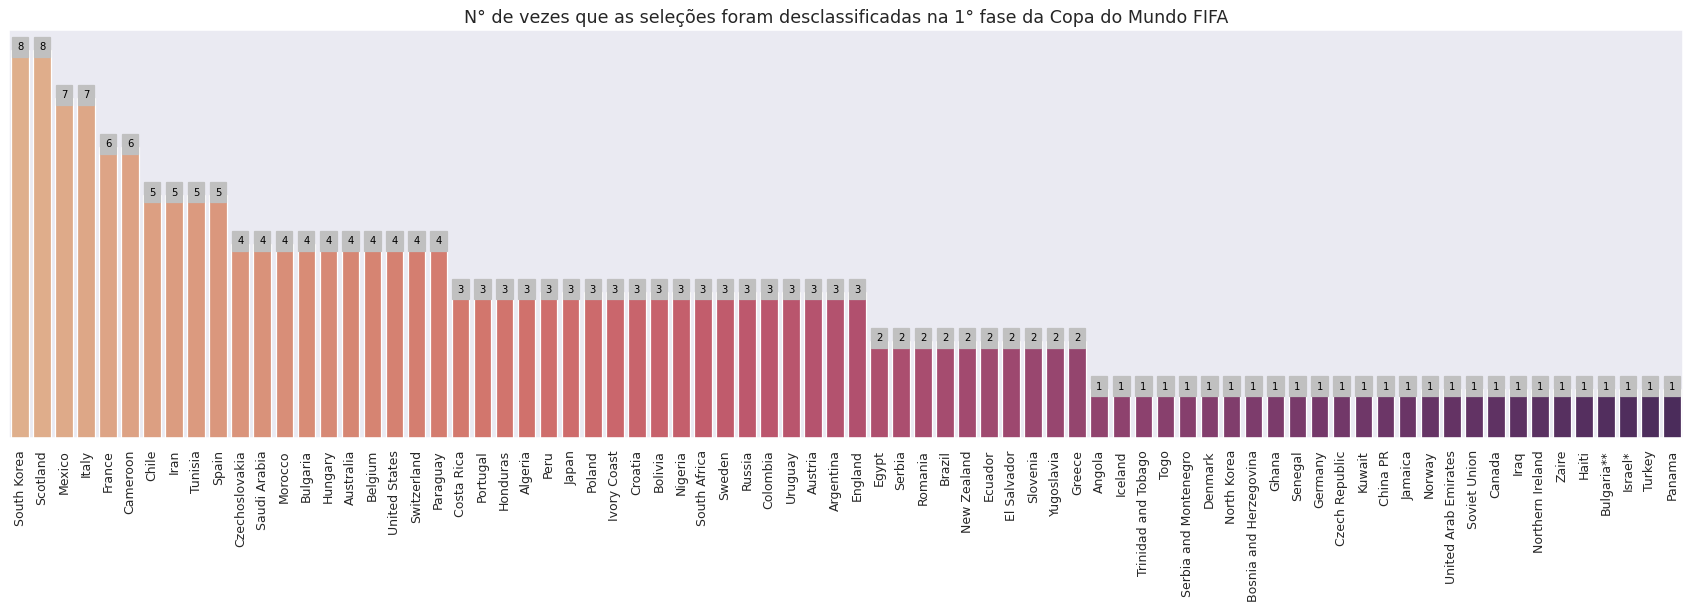

In [70]:
#Gráfico que mostra o número de vezes que as seleções foram desclassificadas na primeira fase da Copa do Mundo FIFA
plt.figure(figsize = (24, 6), dpi = 90)
sns.set_theme(style = "dark")

ax = sns.countplot(x = 'team', data = disqualified, palette = "flare", order = disqualified['team'].value_counts().index)
plt.title('N° de vezes que as seleções foram desclassificadas na 1° fase da Copa do Mundo FIFA', fontsize = 14)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
ax.set(xlabel = None)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = int(p.get_height())
  ax.text(_x, _y, value, ha = "center",
  fontsize = 8,
  color = 'black',
  backgroundcolor = 'silver')  

---


# **Média de gols por jogo nas Copas do Mundo FIFA**

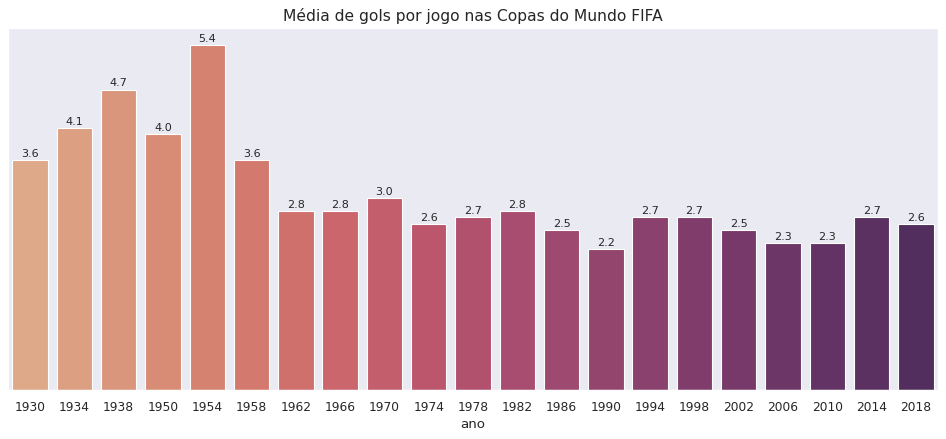

In [72]:
#Gráfico com  a média de gols por jogo nas Copas do Mundo FIFA
plt.figure(figsize = (15, 6), dpi = 80)
sns.set_theme(style = "dark")

ax = sns.barplot(x = 'year', y = 'avg_goals_per_game', data = fifa_summary, palette = "flare")
plt.title('Média de gols por jogo nas Copas do Mundo FIFA', fontsize = 14)
plt.ylabel('média de gols')
plt.xlabel('ano')
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 0.05
  value = float(p.get_height())
  ax.text(_x, _y, value, ha = "center",
  fontsize = 10)  

plt.show()